# Satellite Image Classification

## -> Problem Description
- Satellite images are needed to be classified under one of the following categories:
    - Cloudy
    - Desert
    - Green Area
    - Water

## -> About Dataset
- Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot.
- Dataset was downloaded from kaggle. [https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification](https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification)
- It has a total of 5631 images.

## -> Models Tried
- Multi-layer Perceptron (Dense)
- Convolutional Neural Network (Conv2D)
- EfficientNetV2B0 (Transfer Learning)

## -> Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-score

## 1. Importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import random
import shutil

In [104]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

## 2. Getting the data

In [4]:
# setting the path for dataset
dataset_path = "Dataset/satellite_images"

In [5]:
# walk-through the dataset_path
for dirpath, dirname, filename in os.walk(dataset_path):
    print(f"Directory: {dirpath}")
    print(f"Number of Directories: {len(dirname)}")
    print(f"Number of images: {len(filename)}\n")

Directory: Dataset/satellite_images
Number of Directories: 4
Number of images: 0

Directory: Dataset/satellite_images\cloudy
Number of Directories: 0
Number of images: 1500

Directory: Dataset/satellite_images\desert
Number of Directories: 0
Number of images: 1131

Directory: Dataset/satellite_images\green_area
Number of Directories: 0
Number of images: 1500

Directory: Dataset/satellite_images\water
Number of Directories: 0
Number of images: 1500



In [6]:
class_names = []
for dirname in os.listdir(dataset_path):
    class_names.append(dirname)
class_names

['cloudy', 'desert', 'green_area', 'water']

In [284]:
cloudy_images = []
desert_images = []
green_area_images = []
water_images = []

for single_class in class_names:
    for file_name in os.listdir(dataset_path+"/"+single_class):
        if single_class == "cloudy":
            cloudy_images.append(dataset_path+"/"+single_class+"/"+file_name)
        if single_class == "desert":
            desert_images.append(dataset_path+"/"+single_class+"/"+file_name)
        if single_class == "green_area":
            green_area_images.append(dataset_path+"/"+single_class+"/"+file_name)
        if single_class == "water":
            water_images.append(dataset_path+"/"+single_class+"/"+file_name)

# viewing the directory path for each class for upto 5 images
print(f"Cloudy images (upto 5 img)\n{cloudy_images[:5]}\n")
print(f"Desert images (upto 5 img)\n{desert_images[:5]}\n")
print(f"Green area images (upto 5 img)\n{green_area_images[:5]}\n")
print(f"Water images (upto 5 img)\n{water_images[:5]}\n")

Cloudy images (upto 5 img)
['Dataset/satellite_images/cloudy/train_10021.jpg', 'Dataset/satellite_images/cloudy/train_10043.jpg', 'Dataset/satellite_images/cloudy/train_10070.jpg', 'Dataset/satellite_images/cloudy/train_10081.jpg', 'Dataset/satellite_images/cloudy/train_10096.jpg']

Desert images (upto 5 img)
['Dataset/satellite_images/desert/desert(1).jpg', 'Dataset/satellite_images/desert/desert(10).jpg', 'Dataset/satellite_images/desert/desert(100).jpg', 'Dataset/satellite_images/desert/desert(1000).jpg', 'Dataset/satellite_images/desert/desert(1001).jpg']

Green area images (upto 5 img)
['Dataset/satellite_images/green_area/Forest_1404.jpg', 'Dataset/satellite_images/green_area/Forest_1419.jpg', 'Dataset/satellite_images/green_area/Forest_1456.jpg', 'Dataset/satellite_images/green_area/Forest_1464.jpg', 'Dataset/satellite_images/green_area/Forest_1465.jpg']

Water images (upto 5 img)
['Dataset/satellite_images/water/SeaLake_1.jpg', 'Dataset/satellite_images/water/SeaLake_1004.jpg',

In [8]:
len(cloudy_images), len(desert_images), len(green_area_images), len(water_images)
# since the desert class is less in number when compared to other classes
# we make the train set to be 1100 images for each class and rest of them as test set

(1500, 1131, 1500, 1500)

### 2.1. Visualizing Random Images

In [9]:
def view_random_images(class_name):
    """
    Viewing a random image on specified class
    """
    random_img = random.sample(os.listdir("Dataset/satellite_images/"+class_name), 1)[0]
    img = plt.imread("Dataset/satellite_images/"+class_name+"/"+random_img)/255.
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Class: {class_name.upper()}\nImage: {random_img}")

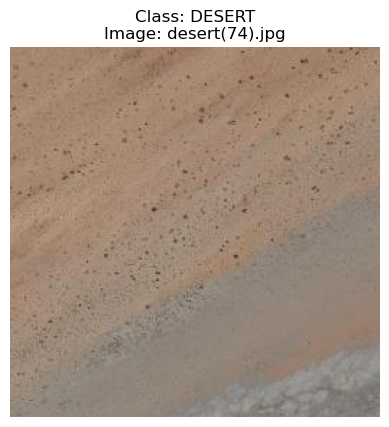

In [126]:
# viewing a random image of desert class
view_random_images("desert")

### 2.2. Making Train and Test splits
- **Train set**: 1100 images for each class
- **Test set**: 400 images for each class except desert_images which has 31 test images

In [11]:
# total classes
class_names

['cloudy', 'desert', 'green_area', 'water']

In [12]:
# number of images in each class
len(cloudy_images), len(desert_images), len(green_area_images), len(water_images)

(1500, 1131, 1500, 1500)

In [13]:
# first 1100 images are selected for train set
os.listdir("Dataset/satellite_images/cloudy")[:1100]

['train_10021.jpg',
 'train_10043.jpg',
 'train_10070.jpg',
 'train_10081.jpg',
 'train_10096.jpg',
 'train_101.jpg',
 'train_10128.jpg',
 'train_10166.jpg',
 'train_10173.jpg',
 'train_10177.jpg',
 'train_10201.jpg',
 'train_10224.jpg',
 'train_10225.jpg',
 'train_10231.jpg',
 'train_10263.jpg',
 'train_10265.jpg',
 'train_10269.jpg',
 'train_10293.jpg',
 'train_10326.jpg',
 'train_10333.jpg',
 'train_10389.jpg',
 'train_10406.jpg',
 'train_10421.jpg',
 'train_10451.jpg',
 'train_10485.jpg',
 'train_10493.jpg',
 'train_10538.jpg',
 'train_10540.jpg',
 'train_10547.jpg',
 'train_10552.jpg',
 'train_10555.jpg',
 'train_10563.jpg',
 'train_10566.jpg',
 'train_10581.jpg',
 'train_10598.jpg',
 'train_1060.jpg',
 'train_10609.jpg',
 'train_10621.jpg',
 'train_10642.jpg',
 'train_10661.jpg',
 'train_10666.jpg',
 'train_10667.jpg',
 'train_10687.jpg',
 'train_1070.jpg',
 'train_10710.jpg',
 'train_10788.jpg',
 'train_10793.jpg',
 'train_108.jpg',
 'train_10816.jpg',
 'train_10856.jpg',
 'trai

In [14]:
# total images of cloudy class
len(os.listdir("Dataset/satellite_images/cloudy")[:1100])

1100

In [15]:
def copy_train_test_images(train):
    """
    Copies the train and test images to a new separated directories for train and test
    """
    # defining source and destination paths
    src = "Dataset/satellite_images"
    trg = "Dataset/satellite_images_modified"

    for class_name in class_names:
        if train:
            files = os.listdir(src+"/"+class_name)[:1100] # copying train data
            trg_dir = "/train/"
        else:
            files = os.listdir(src+"/"+class_name)[1100:] # copying test data
            trg_dir = "/test/"
        # iterating over all the files
        for filename in files:
            # copying the files to the destination directory
            img_src = src+"/"+class_name+"/"+filename
            img_dst = trg+trg_dir+class_name
            shutil.copy2(img_src, img_dst)
        print(f"{class_name}: {len(os.listdir(img_dst))} images copied")

In [16]:
# copying train data to a new location
copy_train_test_images(train=True)

cloudy: 1100 images copied
desert: 1100 images copied
green_area: 1100 images copied
water: 1100 images copied


In [17]:
# copying test data to a new location
copy_train_test_images(train=False)

cloudy: 400 images copied
desert: 31 images copied
green_area: 400 images copied
water: 400 images copied


In [18]:
# walk through the directory
for dirpath, dirname, filename in os.walk("Dataset/satellite_images_modified"):
    print(f"Directory: {dirpath}")
    print(f"Number of Directories: {len(dirname)}")
    print(f"Number of images: {len(filename)}\n")

Directory: Dataset/satellite_images_modified
Number of Directories: 2
Number of images: 0

Directory: Dataset/satellite_images_modified\test
Number of Directories: 4
Number of images: 0

Directory: Dataset/satellite_images_modified\test\cloudy
Number of Directories: 0
Number of images: 400

Directory: Dataset/satellite_images_modified\test\desert
Number of Directories: 0
Number of images: 31

Directory: Dataset/satellite_images_modified\test\green_area
Number of Directories: 0
Number of images: 400

Directory: Dataset/satellite_images_modified\test\water
Number of Directories: 0
Number of images: 400

Directory: Dataset/satellite_images_modified\train
Number of Directories: 4
Number of images: 0

Directory: Dataset/satellite_images_modified\train\cloudy
Number of Directories: 0
Number of images: 1100

Directory: Dataset/satellite_images_modified\train\desert
Number of Directories: 0
Number of images: 1100

Directory: Dataset/satellite_images_modified\train\green_area
Number of Director

## 3. Preprocessing data

In [19]:
# set up train, test directories
train_dir = "Dataset/satellite_images_modified/train"
test_dir = "Dataset/satellite_images_modified/test"

BATCH_SIZE = 32
IMAGE_SIZE = (224,224)

# preparing dataset
train_images = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=IMAGE_SIZE,
                                                                   label_mode="categorical",
                                                                   seed=42)
test_images = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=IMAGE_SIZE,
                                                                   label_mode="categorical",
                                                                   shuffle=False, # needs to be specified otherwise we can't calculate metrics
                                                                   seed=42)
train_images, test_images

Found 4400 files belonging to 4 classes.
Found 1231 files belonging to 4 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>)

In [20]:
# classes
train_images.class_names

['cloudy', 'desert', 'green_area', 'water']

In [21]:
# preprocessed train images and its labels
for img, label in train_images.take(1):
    print(img, label)
# needs the img to be rescaled in the range [0,1]

tf.Tensor(
[[[[ 37.        64.        73.      ]
   [ 37.        64.        73.      ]
   [ 37.214287  64.21429   73.21429 ]
   ...
   [ 35.        65.571434  70.78572 ]
   [ 35.        66.        71.      ]
   [ 35.        66.        71.      ]]

  [[ 37.        64.        73.      ]
   [ 37.        64.        73.      ]
   [ 37.214287  64.21429   73.21429 ]
   ...
   [ 35.        65.571434  70.78572 ]
   [ 35.        66.        71.      ]
   [ 35.        66.        71.      ]]

  [[ 37.        64.        73.      ]
   [ 37.        64.        73.      ]
   [ 37.214287  64.21429   73.21429 ]
   ...
   [ 34.954082  65.617355  70.78572 ]
   [ 35.        66.        71.      ]
   [ 35.        66.        71.      ]]

  ...

  [[ 47.071415  65.07141   75.07141 ]
   [ 47.071415  65.07141   75.07141 ]
   [ 47.071415  65.07141   75.07141 ]
   ...
   [ 41.551014  66.55101   73.55101 ]
   [ 41.428566  66.428566  73.428566]
   [ 41.428566  66.428566  73.428566]]

  [[ 46.        64.        74.    

In [22]:
# preprocessed test images and its labels
for img, label in test_images.take(1):
    print(img, label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

## 4. Creating Callbacks and Evaluation function
- Callbacks
    - EarlyStopping Callback
    - ModelCheckpoint Callback
    - Tensorboard Callback
- Evaluation function
    - Accuracy
    - Precision
    - Recall
    - F1-score

In [23]:
# creating EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, verbose=1)

# creating Tensorboard callback
def create_tensorboard_callback(model_name, file_path):
    return tf.keras.callbacks.TensorBoard(log_dir=file_path+"/"+model_name, update_freq="epoch")

# ModelCheckpoint callback can be created when we fit the model to train data

In [24]:
# creating evaluation function that calculates a model's accuracy, precision, recall, f1-score
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted", zero_division=0)
    # zero_division=0 for removing a warning
    metrics_dict = {
        "Accuracy":accuracy*100,
        "Precision": precision*100,
        "Recall": recall*100,
        "F1-score": f1_score*100
    }
    return metrics_dict

In [25]:
def plot_loss_curves(history):
    """
    Plots the loss curves of a model
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [26]:
# labelling the test set labels
y_labels = []
for img, label in test_images.unbatch():
    y_labels.append(label.numpy().argmax())
y_labels[:5]

[0, 0, 0, 0, 0]

In [27]:
test_images.class_names

['cloudy', 'desert', 'green_area', 'water']

## 5. Creating Models

### 5.1. Creating Multi-layer Perceptron

In [28]:
# directory path to store tensorboard logs and model_checkpoints
TENSORBOARD_FILEPATH = "callbacks/tensorboard"
MODEL_CHECKPOINT_FILEPATH = "callbacks/model_checkpoints"

In [29]:
# class names
train_images.class_names

['cloudy', 'desert', 'green_area', 'water']

In [68]:
%%time
# set random seed
tf.random.set_seed(42)

# creating a model with Sequential API by keras
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1/255.),
    tf.keras.layers.Flatten(), # needs to be flattened
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
], name="model_1_Dense")

# compile the model
model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_1_history = model_1.fit(train_images, epochs=25, validation_data=test_images, validation_steps=len(test_images), callbacks=[early_stopping, create_tensorboard_callback(model_name="model_1_Dense", file_path=TENSORBOARD_FILEPATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+model_1.name, monitor="val_loss", save_best_only=True)])

Epoch 1/25
138/138 [==============================] - ETA: 0s - loss: 2.6723 - accuracy: 0.7375INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 5s 30ms/step - loss: 2.6723 - accuracy: 0.7375 - val_loss: 1.0172 - val_accuracy: 0.7701
Epoch 2/25
138/138 [==============================] - 3s 21ms/step - loss: 1.6247 - accuracy: 0.7782 - val_loss: 1.2230 - val_accuracy: 0.7352
Epoch 3/25
138/138 [==============================] - 3s 21ms/step - loss: 1.4606 - accuracy: 0.7830 - val_loss: 4.3915 - val_accuracy: 0.6742
Epoch 4/25
138/138 [==============================] - 3s 21ms/step - loss: 1.0754 - accuracy: 0.7825 - val_loss: 1.9871 - val_accuracy: 0.6872
Epoch 5/25
135/138 [============================>.] - ETA: 0s - loss: 0.7729 - accuracy: 0.7944INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 4s 27ms/step - loss: 0.7661 - accuracy: 0.7955 - val_loss: 0.6444 - val_accuracy: 0.7896
Epoch 6/25
138/138 [==============================] - 3s 21ms/step - loss: 0.5185 - accuracy: 0.8141 - val_loss: 2.1911 - val_accuracy: 0.6767
Epoch 7/25
138/138 [==============================] - 3s 21ms/step - loss: 0.7416 - accuracy: 0.7832 - val_loss: 1.5687 - val_accuracy: 0.6742
Epoch 8/25
138/138 [==============================] - 3s 21ms/step - loss: 0.5712 - accuracy: 0.8289 - val_loss: 0.6643 - val_accuracy: 0.7685
Epoch 9/25
136/138 [============================>.] - ETA: 0s - loss: 0.3422 - accuracy: 0.8624INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 4s 27ms/step - loss: 0.3417 - accuracy: 0.8627 - val_loss: 0.4751 - val_accuracy: 0.8286
Epoch 10/25
138/138 [==============================] - 3s 21ms/step - loss: 0.3584 - accuracy: 0.8725 - val_loss: 0.5189 - val_accuracy: 0.8578
Epoch 11/25
136/138 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.8768INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 4s 29ms/step - loss: 0.3204 - accuracy: 0.8773 - val_loss: 0.3298 - val_accuracy: 0.8757
Epoch 12/25
138/138 [==============================] - 3s 21ms/step - loss: 0.3890 - accuracy: 0.8591 - val_loss: 0.7661 - val_accuracy: 0.6734
Epoch 13/25
135/138 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.8391INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 4s 28ms/step - loss: 0.4493 - accuracy: 0.8393 - val_loss: 0.2768 - val_accuracy: 0.9001
Epoch 14/25
138/138 [==============================] - 3s 23ms/step - loss: 0.3205 - accuracy: 0.8816 - val_loss: 0.3228 - val_accuracy: 0.8400
Epoch 15/25
138/138 [==============================] - 3s 23ms/step - loss: 0.2819 - accuracy: 0.8855 - val_loss: 0.3080 - val_accuracy: 0.8838
Epoch 16/25
138/138 [==============================] - 3s 22ms/step - loss: 0.2845 - accuracy: 0.8850 - val_loss: 0.2798 - val_accuracy: 0.8976
Epoch 17/25
138/138 [==============================] - 3s 21ms/step - loss: 0.3291 - accuracy: 0.8786 - val_loss: 0.3222 - val_accuracy: 0.8781
Epoch 18/25
138/138 [==============================] - 3s 21ms/step - loss: 0.3091 - accuracy: 0.8843 - val_loss: 0.4570 - val_accuracy: 0.8530
Epoch 19/25
135/138 [============================>.] - ETA: 0s - loss: 0.2518 - accuracy: 0.8944INFO:tensorflow:Assets written to: callbacks/model_c

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 4s 29ms/step - loss: 0.2492 - accuracy: 0.8959 - val_loss: 0.2596 - val_accuracy: 0.9058
Epoch 20/25
138/138 [==============================] - 3s 21ms/step - loss: 0.2415 - accuracy: 0.8961 - val_loss: 0.2872 - val_accuracy: 0.8976
Epoch 21/25
138/138 [==============================] - 3s 21ms/step - loss: 0.2491 - accuracy: 0.8977 - val_loss: 0.3102 - val_accuracy: 0.8822
Epoch 22/25
135/138 [============================>.] - ETA: 0s - loss: 0.2333 - accuracy: 0.9049INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_1_Dense\assets


138/138 [==============================] - 4s 28ms/step - loss: 0.2335 - accuracy: 0.9045 - val_loss: 0.2452 - val_accuracy: 0.9066
Epoch 23/25
138/138 [==============================] - 3s 22ms/step - loss: 0.2338 - accuracy: 0.9000 - val_loss: 0.2512 - val_accuracy: 0.9041
Epoch 24/25
138/138 [==============================] - 3s 22ms/step - loss: 0.2534 - accuracy: 0.8920 - val_loss: 0.3442 - val_accuracy: 0.8180
Epoch 25/25
138/138 [==============================] - 3s 23ms/step - loss: 0.2316 - accuracy: 0.8968 - val_loss: 0.3055 - val_accuracy: 0.8765
Wall time: 1min 23s


#### 5.1.1. Evaluating the model

In [69]:
# evaluating the model_1
model_1.evaluate(test_images)

39/39 [==============================] - 1s 20ms/step - loss: 0.3055 - accuracy: 0.8765


[0.305468887090683, 0.8765231370925903]

In [70]:
# loadingt the best performing model
model_1 = tf.keras.models.load_model(filepath=MODEL_CHECKPOINT_FILEPATH+"/model_1_Dense")
model_1.evaluate(test_images)

39/39 [==============================] - 1s 19ms/step - loss: 0.2452 - accuracy: 0.9066


[0.24516144394874573, 0.9065800309181213]

In [127]:
%%time
# making predictions
model_1_pred_probs = model_1.predict(test_images)
model_1_pred_probs[:5]
# prediction probabilities is returned for each class

39/39 [==============================] - 1s 28ms/step
Wall time: 1.89 s


array([[0.99063385, 0.00181862, 0.00562565, 0.0019219 ],
       [0.99063385, 0.00181862, 0.00562565, 0.0019219 ],
       [0.99063385, 0.00181862, 0.00562565, 0.0019219 ],
       [0.99063385, 0.00181862, 0.00562565, 0.0019219 ],
       [0.99063385, 0.00181862, 0.00562565, 0.0019219 ]], dtype=float32)

In [128]:
model_1_pred_probs[0]

array([0.99063385, 0.00181862, 0.00562565, 0.0019219 ], dtype=float32)

In [129]:
# making labels for prediction probabilities
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>

In [130]:
# calculating results for model_1
model_1_results = evaluate_preds(y_true=y_labels, y_preds=model_1_preds)
model_1_results

{'Accuracy': 90.65800162469537,
 'Precision': 91.23389799260931,
 'Recall': 90.65800162469537,
 'F1-score': 90.5777448402115}

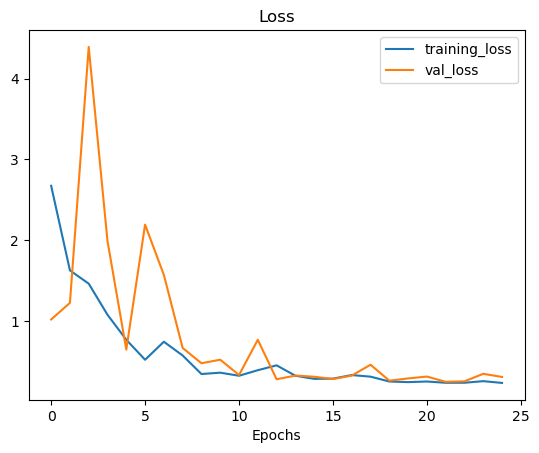

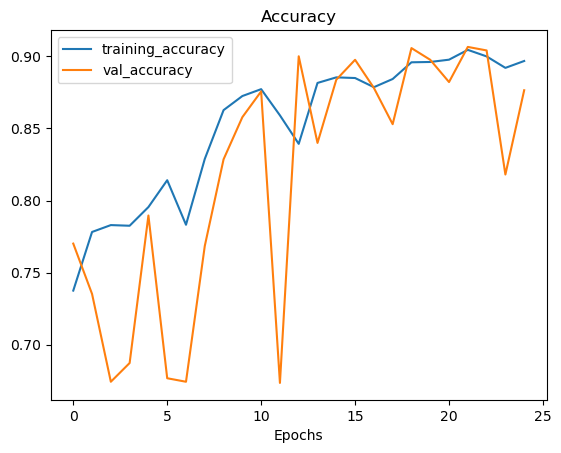

In [131]:
# plotting loss curves of model_1
plot_loss_curves(model_1_history)

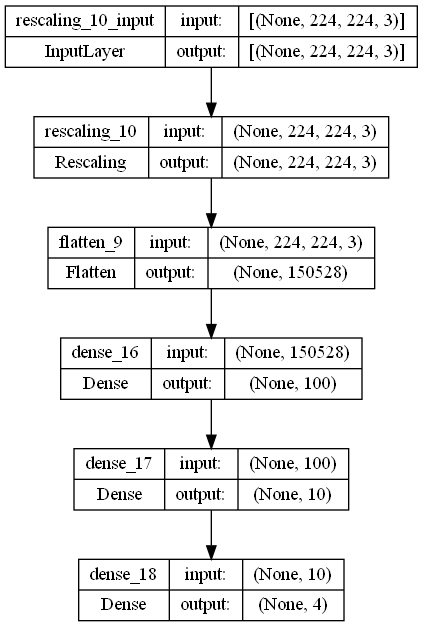

In [78]:
# plotting the model_1
tf.keras.utils.plot_model(model_1, show_shapes=True)

### 5.2. Creating Conv2D Model

In [66]:
%%time
# set random seed
tf.random.set_seed(42)

# creating a model using Sequential API of keras
model_2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1/255.),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2, padding="valid"),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2, padding="valid"),

    tf.keras.layers.Flatten(),
    # flatten layer needs to be specified before a dense layer and not before a Conv2D layer since Conv2D layer can handle batched data
    tf.keras.layers.Dense(4, activation="softmax")

], name="model_2_Conv2D")

# compile the model
model_2.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# fit the model
model_2_history = model_2.fit(train_images, epochs=25, validation_data=test_images, validation_steps=len(test_images), callbacks=[early_stopping, create_tensorboard_callback(model_name=model_2.name, file_path=TENSORBOARD_FILEPATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+model_2.name, monitor="val_loss", save_best_only=True)])

Epoch 1/25
136/138 [============================>.] - ETA: 0s - loss: 0.4023 - accuracy: 0.7548

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 7s 45ms/step - loss: 0.4005 - accuracy: 0.7564 - val_loss: 0.4786 - val_accuracy: 0.7319
Epoch 2/25
137/138 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.7885

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 44ms/step - loss: 0.3215 - accuracy: 0.7889 - val_loss: 0.4127 - val_accuracy: 0.7604
Epoch 3/25
137/138 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.8034

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 42ms/step - loss: 0.3134 - accuracy: 0.8039 - val_loss: 0.3976 - val_accuracy: 0.7522
Epoch 4/25
137/138 [============================>.] - ETA: 0s - loss: 0.3057 - accuracy: 0.8077

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 43ms/step - loss: 0.3058 - accuracy: 0.8075 - val_loss: 0.3941 - val_accuracy: 0.7652
Epoch 5/25
138/138 [==============================] - 6s 40ms/step - loss: 0.3013 - accuracy: 0.8139 - val_loss: 0.3946 - val_accuracy: 0.7506
Epoch 6/25
137/138 [============================>.] - ETA: 0s - loss: 0.3017 - accuracy: 0.8177

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 43ms/step - loss: 0.3018 - accuracy: 0.8180 - val_loss: 0.3767 - val_accuracy: 0.7677
Epoch 7/25
138/138 [==============================] - 5s 39ms/step - loss: 0.2923 - accuracy: 0.8243 - val_loss: 0.5644 - val_accuracy: 0.7311
Epoch 8/25
137/138 [============================>.] - ETA: 0s - loss: 0.3006 - accuracy: 0.8232

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 43ms/step - loss: 0.3003 - accuracy: 0.8236 - val_loss: 0.3687 - val_accuracy: 0.7701
Epoch 9/25
137/138 [============================>.] - ETA: 0s - loss: 0.2881 - accuracy: 0.8385

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 46ms/step - loss: 0.2880 - accuracy: 0.8389 - val_loss: 0.3544 - val_accuracy: 0.7701
Epoch 10/25
137/138 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.8444

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 45ms/step - loss: 0.2710 - accuracy: 0.8445 - val_loss: 0.3407 - val_accuracy: 0.8067
Epoch 11/25
138/138 [==============================] - 5s 38ms/step - loss: 0.2661 - accuracy: 0.8630 - val_loss: 0.3438 - val_accuracy: 0.7709
Epoch 12/25
137/138 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.8718

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 42ms/step - loss: 0.2637 - accuracy: 0.8720 - val_loss: 0.3173 - val_accuracy: 0.8245
Epoch 13/25
137/138 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.8914

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 46ms/step - loss: 0.2388 - accuracy: 0.8916 - val_loss: 0.3079 - val_accuracy: 0.8286
Epoch 14/25
137/138 [============================>.] - ETA: 0s - loss: 0.2325 - accuracy: 0.8983

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 43ms/step - loss: 0.2324 - accuracy: 0.8984 - val_loss: 0.3072 - val_accuracy: 0.8408
Epoch 15/25
138/138 [==============================] - 5s 38ms/step - loss: 0.2724 - accuracy: 0.8984 - val_loss: 0.8374 - val_accuracy: 0.7595
Epoch 16/25
137/138 [============================>.] - ETA: 0s - loss: 0.2354 - accuracy: 0.9097

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 42ms/step - loss: 0.2364 - accuracy: 0.9091 - val_loss: 0.2695 - val_accuracy: 0.8895
Epoch 17/25
138/138 [==============================] - 6s 39ms/step - loss: 0.2080 - accuracy: 0.9284 - val_loss: 0.2812 - val_accuracy: 0.8879
Epoch 18/25
137/138 [============================>.] - ETA: 0s - loss: 0.2027 - accuracy: 0.9327

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 44ms/step - loss: 0.2026 - accuracy: 0.9327 - val_loss: 0.2460 - val_accuracy: 0.9204
Epoch 19/25
138/138 [==============================] - 5s 38ms/step - loss: 0.1981 - accuracy: 0.9332 - val_loss: 0.3014 - val_accuracy: 0.8944
Epoch 20/25
137/138 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.9364

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 6s 42ms/step - loss: 0.1917 - accuracy: 0.9366 - val_loss: 0.2296 - val_accuracy: 0.9196
Epoch 21/25
137/138 [============================>.] - ETA: 0s - loss: 0.1818 - accuracy: 0.9396

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 7s 48ms/step - loss: 0.1814 - accuracy: 0.9398 - val_loss: 0.2245 - val_accuracy: 0.9253
Epoch 22/25
137/138 [============================>.] - ETA: 0s - loss: 0.1761 - accuracy: 0.9430

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 7s 47ms/step - loss: 0.1767 - accuracy: 0.9425 - val_loss: 0.2061 - val_accuracy: 0.9391
Epoch 23/25
138/138 [==============================] - 6s 41ms/step - loss: 0.1694 - accuracy: 0.9450 - val_loss: 0.2257 - val_accuracy: 0.9342
Epoch 24/25
138/138 [==============================] - 6s 40ms/step - loss: 0.1691 - accuracy: 0.9441 - val_loss: 0.2178 - val_accuracy: 0.9123
Epoch 25/25
137/138 [============================>.] - ETA: 0s - loss: 0.1577 - accuracy: 0.9503

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_2_Conv2D\assets


138/138 [==============================] - 7s 49ms/step - loss: 0.1572 - accuracy: 0.9505 - val_loss: 0.1887 - val_accuracy: 0.9366
Wall time: 2min 30s


#### 5.2.1. Evaluating the model

In [79]:
# evaluating the model
model_2.evaluate(test_images)

39/39 [==============================] - 1s 22ms/step - loss: 0.1887 - accuracy: 0.9366


[0.1886620968580246, 0.9366368651390076]

In [80]:
# loading the best performing model
model_2 = tf.keras.models.load_model(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+model_2.name)
model_2.evaluate(test_images)

39/39 [==============================] - 1s 26ms/step - loss: 0.1887 - accuracy: 0.9366


[0.1886620968580246, 0.9366368651390076]

In [132]:
%%time
# prediction probabilities
model_2_pred_probs = model_2.predict(test_images)
model_2_pred_probs[:5]

39/39 [==============================] - 1s 29ms/step
Wall time: 1.96 s


array([[9.9999988e-01, 9.8354685e-23, 8.1824474e-08, 4.4157719e-13],
       [9.9999988e-01, 9.8354685e-23, 8.1824474e-08, 4.4157719e-13],
       [9.9999988e-01, 9.8354685e-23, 8.1824474e-08, 4.4157719e-13],
       [9.9999988e-01, 9.8354685e-23, 8.1824474e-08, 4.4157719e-13],
       [9.9999988e-01, 9.8354685e-23, 8.1824474e-08, 4.4157719e-13]],
      dtype=float32)

In [133]:
# making labels for prediction probabilities
model_2_preds = model_2_pred_probs.argmax(axis=1)
model_2_preds[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [134]:
# calculating results for model_2
model_2_results = evaluate_preds(y_true=y_labels, y_preds=model_2_preds)
model_2_results

{'Accuracy': 93.66368805848904,
 'Precision': 93.8321749857087,
 'Recall': 93.66368805848904,
 'F1-score': 93.65353371242891}

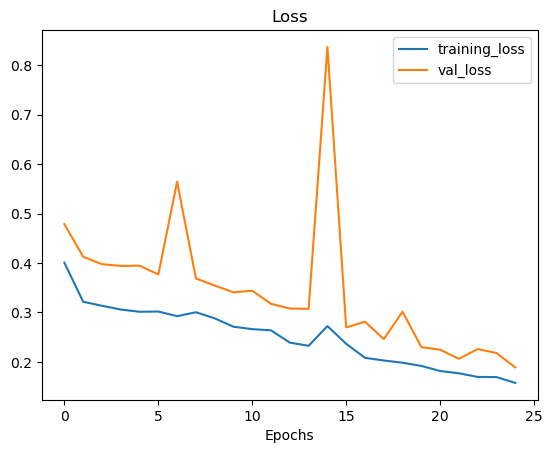

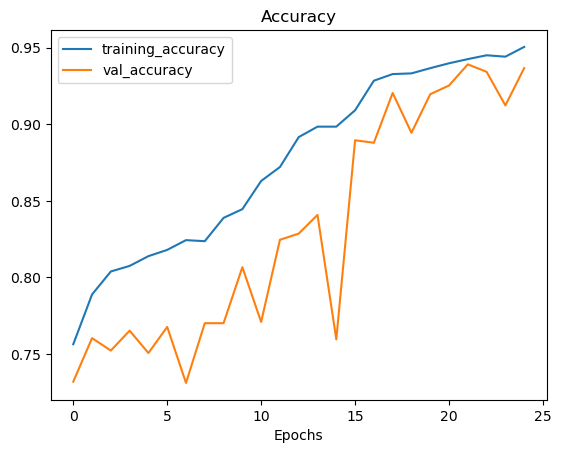

In [135]:
# plotting loss curves for model_2
plot_loss_curves(model_2_history)

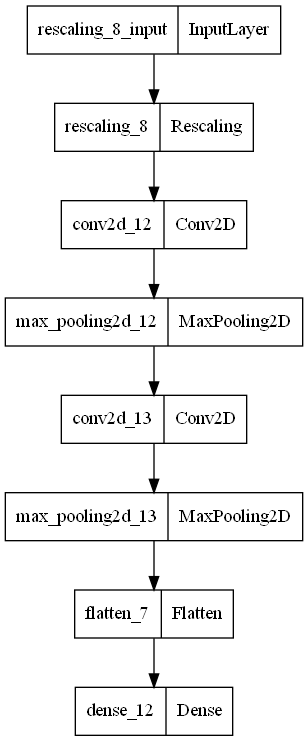

In [102]:
# plotting the model
tf.keras.utils.plot_model(model_2)

### 5.3. Creating a model with EfficientNetV2B0 as a layer (Feature Extraction and Fine-tuning)

In [121]:
# set random seed
tf.random.set_seed(42)

# importing EfficientNetV2B0 model
efficient_net_layer = tf.keras.applications.EfficientNetV2B0(include_top=False)
efficient_net_layer.trainable = False

# create a model using Functional API of keras
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = efficient_net_layer(inputs, training=False)
x = layers.GlobalMaxPool2D(name="global_max_pool_2d")(x)
x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_efficient_net_feature_extractor")

# compile the model
model_3.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [122]:
%%time
# fit the model
model_3_history = model_3.fit(train_images, epochs=5, validation_data=test_images, validation_steps=len(test_images), callbacks=[early_stopping, create_tensorboard_callback(model_name=model_3.name, file_path=TENSORBOARD_FILEPATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+model_3.name)])

Epoch 1/5
137/138 [============================>.] - ETA: 0s - loss: 0.1938 - accuracy: 0.9393

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


138/138 [==============================] - 86s 576ms/step - loss: 0.1931 - accuracy: 0.9395 - val_loss: 0.0764 - val_accuracy: 0.9797
Epoch 2/5
137/138 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9909

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


138/138 [==============================] - 75s 542ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0735 - val_accuracy: 0.9846
Epoch 3/5
137/138 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9934

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


138/138 [==============================] - 68s 494ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0648 - val_accuracy: 0.9846
Epoch 4/5
137/138 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9922

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


138/138 [==============================] - 70s 507ms/step - loss: 0.0195 - accuracy: 0.9923 - val_loss: 0.1236 - val_accuracy: 0.9773
Epoch 5/5
137/138 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9959

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_efficient_net_feature_extractor\assets


138/138 [==============================] - 68s 496ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0672 - val_accuracy: 0.9862
Wall time: 6min 7s


#### 5.3.1. Evaluating the model

In [123]:
# evaluating the model
model_3.evaluate(test_images)

39/39 [==============================] - 4s 92ms/step - loss: 0.0672 - accuracy: 0.9862


[0.06724273413419724, 0.9861900806427002]

In [124]:
# loading the best performed model
model_3 = tf.keras.models.load_model(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+model_3.name)
model_3.evaluate(test_images)

39/39 [==============================] - 6s 91ms/step - loss: 0.0672 - accuracy: 0.9862


[0.06724273413419724, 0.9861900806427002]

In [125]:
%%time
# prediction probabilities
model_3_pred_probs = model_3.predict(test_images)
model_3_pred_probs[:5]

39/39 [==============================] - 6s 94ms/step
Wall time: 6.35 s


array([[9.9945873e-01, 8.8372235e-07, 1.4893991e-04, 3.9151945e-04],
       [9.9945873e-01, 8.8372235e-07, 1.4893991e-04, 3.9151945e-04],
       [9.9945873e-01, 8.8372235e-07, 1.4893991e-04, 3.9151945e-04],
       [9.9945873e-01, 8.8372235e-07, 1.4893991e-04, 3.9151945e-04],
       [9.9945873e-01, 8.8372235e-07, 1.4893991e-04, 3.9151945e-04]],
      dtype=float32)

In [136]:
# making labels for prediction probabilities
model_3_preds = model_3_pred_probs.argmax(axis=1)
model_3_preds[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [137]:
# calculating results for model_3
model_3_results = evaluate_preds(y_true=y_labels, y_preds=model_3_preds)
model_3_results

{'Accuracy': 98.61900893582454,
 'Precision': 98.62075913581674,
 'Recall': 98.61900893582454,
 'F1-score': 98.61898951536459}

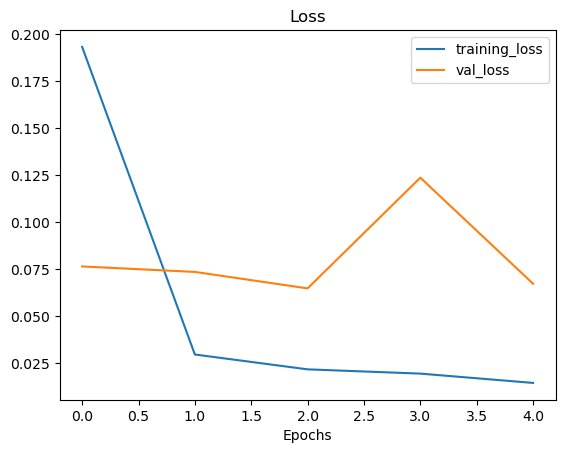

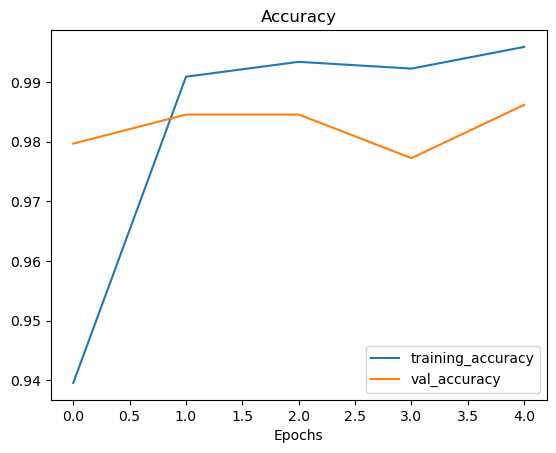

In [138]:
# plotting loss curves for model_3
plot_loss_curves(model_3_history)

#### 5.3.2. Fine-tuning the model

In [142]:
# viewing the layers in model_3
model_3.layers

In [146]:
for num, layer in enumerate(model_3.layers[1].layers):
    print(f"{num}.   {layer.name}    {layer.trainable}")
# totally there are 269 layers which are not trainable

0.   input_4    True
1.   rescaling_12    False
2.   normalization_1    False
3.   stem_conv    False
4.   stem_bn    False
5.   stem_activation    False
6.   block1a_project_conv    False
7.   block1a_project_bn    False
8.   block1a_project_activation    False
9.   block2a_expand_conv    False
10.   block2a_expand_bn    False
11.   block2a_expand_activation    False
12.   block2a_project_conv    False
13.   block2a_project_bn    False
14.   block2b_expand_conv    False
15.   block2b_expand_bn    False
16.   block2b_expand_activation    False
17.   block2b_project_conv    False
18.   block2b_project_bn    False
19.   block2b_drop    False
20.   block2b_add    False
21.   block3a_expand_conv    False
22.   block3a_expand_bn    False
23.   block3a_expand_activation    False
24.   block3a_project_conv    False
25.   block3a_project_bn    False
26.   block3b_expand_conv    False
27.   block3b_expand_bn    False
28.   block3b_expand_activation    False
29.   block3b_project_conv    False
3

In [148]:
# making the EfficientNetV2b0 trainable
model_3.layers[1].trainable = True

# making the last 10 layers trainable
for num, layer in enumerate(model_3.layers[1].layers):
    if num < 260:
        layer.trainable = False
    print(f"{num}.   {layer.name}    {layer.trainable}")

0.   input_4    False
1.   rescaling_12    False
2.   normalization_1    False
3.   stem_conv    False
4.   stem_bn    False
5.   stem_activation    False
6.   block1a_project_conv    False
7.   block1a_project_bn    False
8.   block1a_project_activation    False
9.   block2a_expand_conv    False
10.   block2a_expand_bn    False
11.   block2a_expand_activation    False
12.   block2a_project_conv    False
13.   block2a_project_bn    False
14.   block2b_expand_conv    False
15.   block2b_expand_bn    False
16.   block2b_expand_activation    False
17.   block2b_project_conv    False
18.   block2b_project_bn    False
19.   block2b_drop    False
20.   block2b_add    False
21.   block3a_expand_conv    False
22.   block3a_expand_bn    False
23.   block3a_expand_activation    False
24.   block3a_project_conv    False
25.   block3a_project_bn    False
26.   block3b_expand_conv    False
27.   block3b_expand_bn    False
28.   block3b_expand_activation    False
29.   block3b_project_conv    False


In [149]:
# need to compile the model to save the changes
model_3.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [150]:
%%time
# fitting the model_3_fine_tuned
model_3_fine_tuned_history = model_3.fit(train_images, epochs=5, validation_data=test_images, validation_steps=len(test_images), callbacks=[early_stopping, create_tensorboard_callback(model_name=model_3.name+"_fine_tuned", file_path=TENSORBOARD_FILEPATH), tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_CHECKPOINT_FILEPATH+"/"+"model_3_fine_tuned")])

Epoch 1/5
138/138 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9936

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


138/138 [==============================] - 80s 523ms/step - loss: 0.0174 - accuracy: 0.9936 - val_loss: 0.0112 - val_accuracy: 0.9968
Epoch 2/5
138/138 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9980

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


138/138 [==============================] - 70s 504ms/step - loss: 0.0036 - accuracy: 0.9980 - val_loss: 0.0091 - val_accuracy: 0.9935
Epoch 3/5
138/138 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


138/138 [==============================] - 72s 519ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.0095 - val_accuracy: 0.9943
Epoch 4/5
138/138 [==============================] - ETA: 0s - loss: 1.3415e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


138/138 [==============================] - 124s 902ms/step - loss: 1.3415e-04 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9968
Epoch 5/5
138/138 [==============================] - ETA: 0s - loss: 7.7254e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoints\model_3_fine_tuned\assets


138/138 [==============================] - 131s 951ms/step - loss: 7.7254e-05 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9968
Wall time: 7min 58s


In [151]:
# evaluate the model
model_3.evaluate(test_images)

39/39 [==============================] - 16s 397ms/step - loss: 0.0080 - accuracy: 0.9968


[0.007958047091960907, 0.9967505931854248]

In [152]:
# loading the best performed model and evaluating again
model_3 = tf.keras.models.load_model(filepath=MODEL_CHECKPOINT_FILEPATH+"/model_3_fine_tuned")
model_3.evaluate(test_images)

39/39 [==============================] - 17s 375ms/step - loss: 0.0080 - accuracy: 0.9968


[0.007958047091960907, 0.9967505931854248]

In [176]:
%%time
# calculating prediction probabilities
model_3_fine_tuned_pred_probs = model_3.predict(test_images)
model_3_fine_tuned_pred_probs[:5]

39/39 [==============================] - 3s 83ms/step
Wall time: 3.27 s


array([[1.000000e+00, 9.699042e-13, 6.547428e-11, 9.669609e-11],
       [1.000000e+00, 9.699042e-13, 6.547428e-11, 9.669609e-11],
       [1.000000e+00, 9.699042e-13, 6.547428e-11, 9.669609e-11],
       [1.000000e+00, 9.699042e-13, 6.547428e-11, 9.669609e-11],
       [1.000000e+00, 9.699042e-13, 6.547428e-11, 9.669609e-11]],
      dtype=float32)

In [228]:
model_3_fine_tuned_pred_probs[-5:]

array([[6.2113303e-13, 3.8904817e-13, 6.2443942e-15, 1.0000000e+00],
       [1.2802321e-12, 4.4835744e-13, 1.8142415e-10, 1.0000000e+00],
       [1.2126867e-12, 3.2979004e-13, 2.2140338e-13, 1.0000000e+00],
       [1.4016698e-10, 8.5307705e-13, 3.0853254e-08, 1.0000000e+00],
       [2.1119862e-12, 4.2521009e-10, 1.5074805e-09, 1.0000000e+00]],
      dtype=float32)

In [232]:
model_3_fine_tuned_pred_probs.shape

(1231, 4)

In [157]:
# making labels for prediction probabilities
model_3_fine_tuned_preds = model_3_fine_tuned_pred_probs.argmax(axis=1)
model_3_fine_tuned_preds

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [159]:
# calculating results for model_3_fine_tuned
model_3_fine_tuned_results = evaluate_preds(y_true=y_labels, y_preds=model_3_fine_tuned_preds)
model_3_fine_tuned_results

{'Accuracy': 99.67506092607637,
 'Precision': 99.67586517039044,
 'Recall': 99.67506092607637,
 'F1-score': 99.67505889519445}

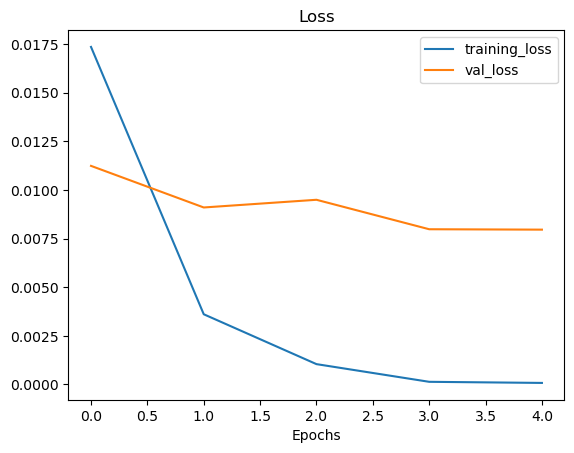

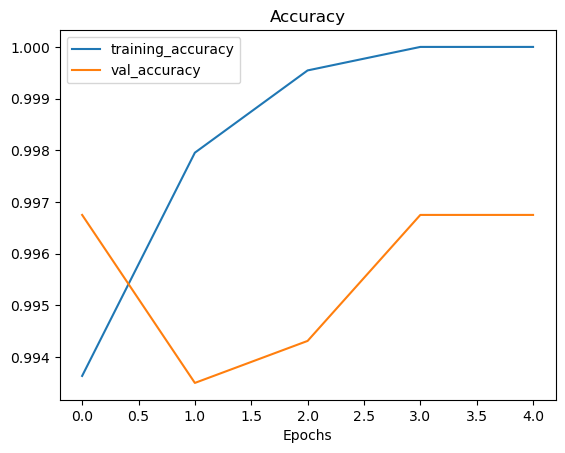

In [153]:
# plotting loss curves for model_3_fine_tuned
plot_loss_curves(model_3_fine_tuned_history)

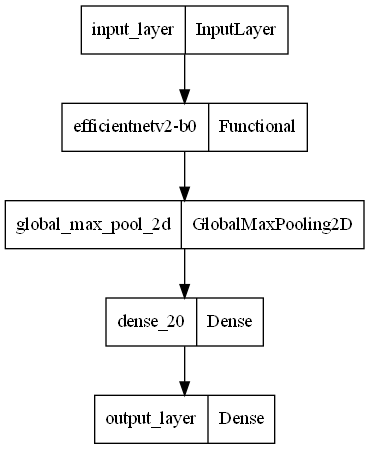

In [155]:
# plotting the model
tf.keras.utils.plot_model(model_3)

## 6. Comparing the results

In [177]:
# creating a dataframe to view all the models results in one place
all_models_results = pd.DataFrame({
    "Model_1_Dense": model_1_results,
    "Model_2_Conv2D": model_2_results,
    "Model_3_EfficientNet": model_3_results,
    "Model_3_fine_tuned": model_3_fine_tuned_results
})
all_models_results

,Model_1_Dense,Model_2_Conv2D,Model_3_EfficientNet,Model_3_fine_tuned
Accuracy,90.658002,93.663688,98.619009,99.675061
Precision,91.233898,93.832175,98.620759,99.675865
Recall,90.658002,93.663688,98.619009,99.675061
F1-score,90.577745,93.653534,98.618990,99.675059


In [178]:
# transposing the dataframe to make it more readable
all_models_results = all_models_results.T
all_models_results

,Accuracy,Precision,Recall,F1-score
Model_1_Dense,90.658002,91.233898,90.658002,90.577745
Model_2_Conv2D,93.663688,93.832175,93.663688,93.653534
Model_3_EfficientNet,98.619009,98.620759,98.619009,98.618990
Model_3_fine_tuned,99.675061,99.675865,99.675061,99.675059


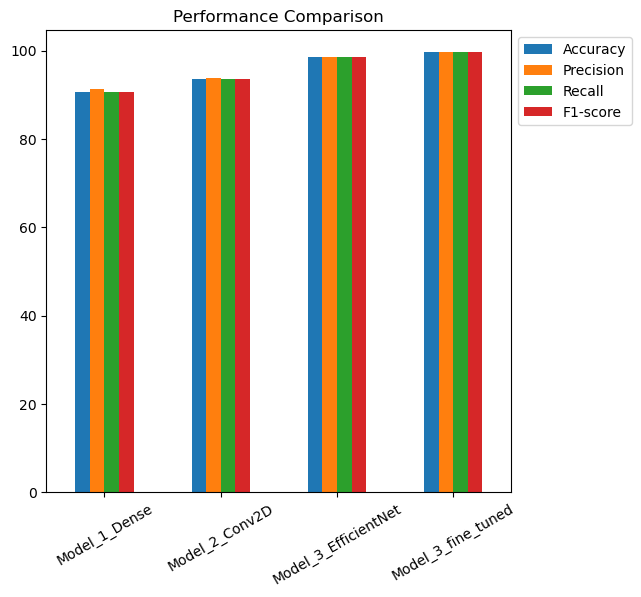

In [179]:
# plotting the results of all the models
all_models_results.plot.bar(figsize=(6,6))
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Performance Comparison")
plt.xticks(rotation=30);

## 7. Custom Image Prediction

In [180]:
class_names

['cloudy', 'desert', 'green_area', 'water']

In [275]:
# creating a function to make prediction on custom images
def custom_prediction(model, img_path, rescale=False, org_label=False):
    """
    Returns a plotted image with predicted class and its probability
    """
    # first we need to preprocess the image
    image = tf.io.read_file(img_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, size=[224,224])
    if rescale:
        image = image / 255.
    # rescaling is not needed for EfficientNetV2B0 since it has a rescaling layer

    # making predictions
    pred_probs = model.predict(tf.expand_dims(image, axis=0)) # needs to be expanded due to batched train data
    preds = pred_probs.argmax(axis=1)

    color = "black"
    # if label is specified
    if org_label:
        if org_label == class_names[preds[0]]:
            color="green"
        else:
            color="red"

    # plotting the prediction with image
    plt.figure(figsize=(10,7))
    plt.imshow(plt.imread(img_path))
    plt.title(f"Prediction: {class_names[preds[0]].upper()}\nPrediction Probability: {np.max(pred_probs)*100:.2f}%", color=color)

    # if label is specified
    if org_label:
        plt.suptitle(f"Original: {org_label.upper()}", color="green")

    plt.xticks([])
    plt.yticks([]);

1/1 [==============================] - 0s 32ms/step


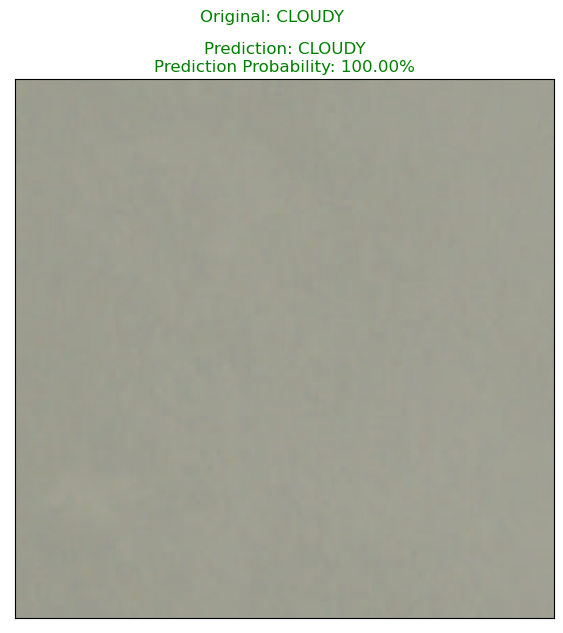

In [277]:
# predicting with known labels
custom_prediction(model=model_3, img_path="Dataset/satellite_images_modified/test/cloudy/train_743.jpg", org_label="cloudy")

1/1 [==============================] - 0s 34ms/step


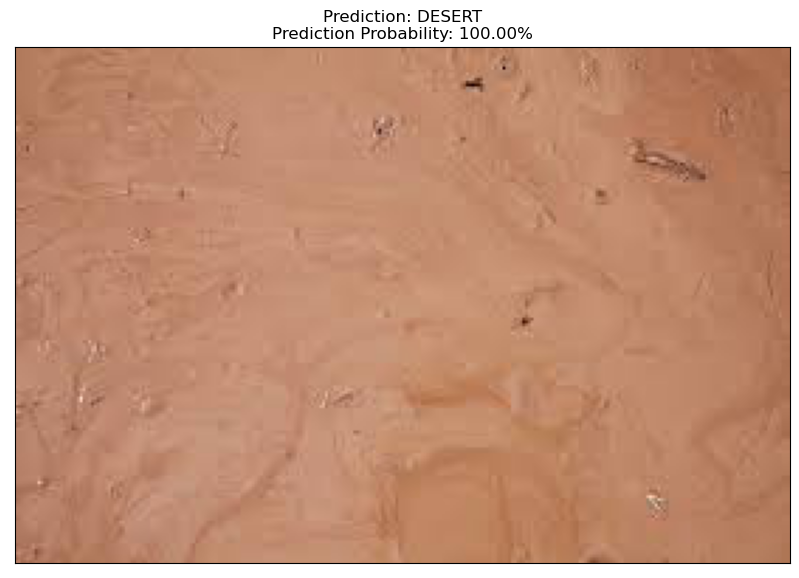

In [276]:
# predicting without knowing the labels
custom_prediction(model=model_3, img_path="Dataset/custom_images/Desert.jpeg")

## 8. Summary

In [278]:
# The models performance
all_models_results

,Accuracy,Precision,Recall,F1-score
Model_1_Dense,90.658002,91.233898,90.658002,90.577745
Model_2_Conv2D,93.663688,93.832175,93.663688,93.653534
Model_3_EfficientNet,98.619009,98.620759,98.619009,98.618990
Model_3_fine_tuned,99.675061,99.675865,99.675061,99.675059


- **Best performing model: Model_3_fine_tuned**
- **Fastest model in making prediction: Model_1_Dense**